In [ ]:
!pip install requests beautifulsoup4 requests-html pandas seaborn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3


In [ ]:
# 首先，確保已安裝必要的套件：
# !pip install requests-html nest-asyncio

from requests_html import AsyncHTMLSession
import asyncio
import nest_asyncio

# 應用 nest_asyncio 來解決 Jupyter 的事件循環問題
nest_asyncio.apply()

async def scrape_js_website(url):
  # 創建一個異步 HTML 會話
  session = AsyncHTMLSession()

  # 發送 GET 請求到指定 URL
  response = await session.get(url)

  # 執行 JavaScript (這可能需要一些時間)
  await response.html.arender(timeout=20)

  # 檢查請求是否成功
  if response.status_code == 200:
      return response
  else:
      print(f"請求失敗,狀態碼: {response.status_code}")

  # 關閉會話
  await session.close()

In [ ]:
import json
import re

def grab_data(response):
  script_elements = response.html.find('script')
  target_scripts = [_ for _ in script_elements if 'root.App.main' in _.text]
  target_script = target_scripts[0].text

  matches = [_ for _ in re.finditer(r'root\.App\.main = ', target_script)]
  start = matches[0].end()
  end = -11
  raw_data = target_script[start:end]

  raw_data = raw_data.replace('undefined', 'null')
  return json.loads(raw_data)

In [ ]:
def get_hoding_detail(data):
  return data['context']['dispatcher']['stores']['QuoteETFStore']['etfInfo']['data']['portfolio']['top10Holdings']['holdingDetail']

In [ ]:
def get_invest_industry_weights(data):
  return data['context']['dispatcher']['stores']['QuoteETFStore']['etfInfo']['data']['portfolio']['investIndustryWeights']

In [ ]:
def get_divend(data):
  return data['context']['dispatcher']['stores']['QuoteETFStore']['etfInfo']['data']['dividend']

In [ ]:
stock_code = '00919'
url = f"https://tw.stock.yahoo.com/quote/{stock_code}.TW/holding"
response = asyncio.get_event_loop().run_until_complete(scrape_js_website(url))

data = grab_data(response)
print(get_hoding_detail(data))
print(get_invest_industry_weights(data))
print(get_divend(data))

[{'date': '2024/08/01', 'ticker': '2454', 'name': '聯發科', 'weighting': '10.47'}, {'date': '2024/08/01', 'ticker': '2303', 'name': '聯電', 'weighting': '10.44'}, {'date': '2024/08/01', 'ticker': '3034', 'name': '聯詠', 'weighting': '9.37'}, {'date': '2024/08/01', 'ticker': '2603', 'name': '長榮', 'weighting': '9.25'}, {'date': '2024/08/01', 'ticker': '2891', 'name': '中信金', 'weighting': '8.89'}, {'date': '2024/08/01', 'ticker': '5347', 'name': '世界', 'weighting': '6.92'}, {'date': '2024/08/01', 'ticker': '2618', 'name': '長榮航', 'weighting': '6.55'}, {'date': '2024/08/01', 'ticker': '5483', 'name': '中美晶', 'weighting': '4.00'}, {'date': '2024/08/01', 'ticker': '6239', 'name': '力成', 'weighting': '3.79'}, {'date': '2024/08/01', 'ticker': '6176', 'name': '瑞儀', 'weighting': '3.15'}]
{'date': '2024/09/28', 'detail': [{'date': '2024/09/28', 'name': '半導體業', 'id': 'TWSE-24', 'weighting': '45.94'}, {'date': '2024/09/28', 'name': '航運業', 'id': 'TWSE-15', 'weighting': '17.87'}, {'date': '2024/09/28', 'name': '

In [ ]:
etfs = ['00919', '00878', '00900', '00713', '00915', '0056']

etf_result = {}
for etf in etfs:
  url = f"https://tw.stock.yahoo.com/quote/{etf}.TW/holding"
  response = asyncio.get_event_loop().run_until_complete(scrape_js_website(url))

  result = {}
  data = grab_data(response)

  result['data'] = data
  result['hoding_detail'] = get_hoding_detail(data)
  result['invest_industry_weights'] = get_invest_industry_weights(data)
  result['divend'] = get_divend(data)
  etf_result[etf] = result

In [ ]:
data

{'00919': {'last': '0.72',
  'last12M': '2.63',
  'yield': {'yield_12mDate': '2024/10/01', 'yield_12m': '11.11'},
  'historical': [{'date': '2024/09/23', 'dividend': '0.72'},
   {'date': '2024/06/24', 'dividend': '0.7'},
   {'date': '2024/03/18', 'dividend': '0.66'},
   {'date': '2023/12/18', 'dividend': '0.55'},
   {'date': '2023/09/18', 'dividend': '0.54'},
   {'date': '2023/06/16', 'dividend': '0.54'}],
  'lastDate': '2024/09/23'},
 '00878': {'last': '0.55',
  'last12M': '1.81',
  'yield': {'yield_12mDate': '2024/10/01', 'yield_12m': '7.97'},
  'historical': [{'date': '2024/08/16', 'dividend': '0.55'},
   {'date': '2024/05/17', 'dividend': '0.51'},
   {'date': '2024/02/27', 'dividend': '0.4'},
   {'date': '2023/11/16', 'dividend': '0.35'},
   {'date': '2023/08/16', 'dividend': '0.35'},
   {'date': '2023/05/17', 'dividend': '0.27'},
   {'date': '2023/02/16', 'dividend': '0.27'},
   {'date': '2022/11/16', 'dividend': '0.28'},
   {'date': '2022/08/16', 'dividend': '0.28'},
   {'date': 

<ipython-input-36-7a4babc1690f>:33: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  ax = sns.lineplot(x='date', y='dividend', hue='ticker', data=df_all, marker='o', palette=color_palette)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 

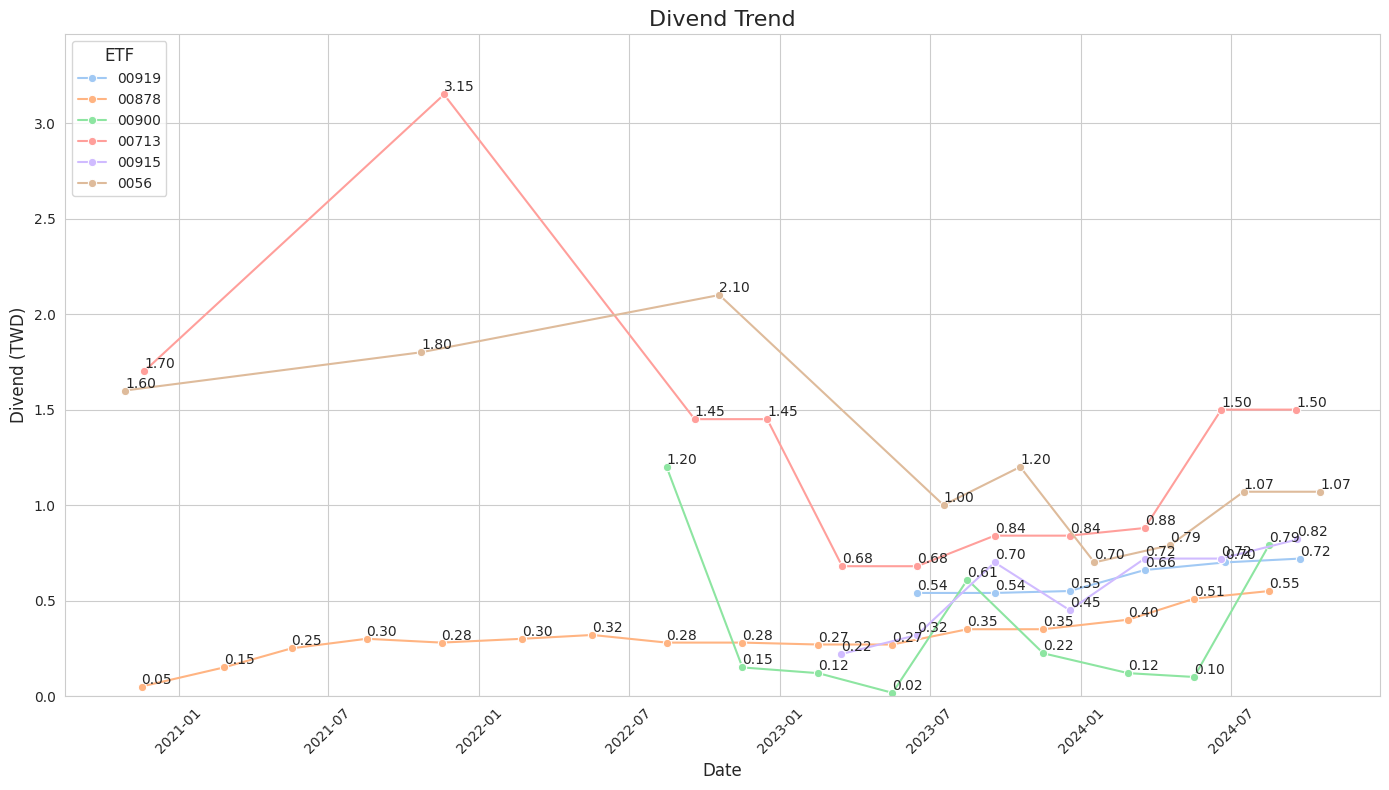

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 數據
data = {k: v['divend']['historical'] for k, v in etf_result.items()}

# 創建一個空的 DataFrame 來存儲所有數據
df_all = pd.DataFrame()

# 處理每個標的的數據
for ticker, ticker_data in data.items():
    df = pd.DataFrame(ticker_data)
    df['date'] = pd.to_datetime(df['date'])
    df['dividend'] = df['dividend'].astype(float)
    df['ticker'] = ticker
    df_all = pd.concat([df_all, df], ignore_index=True)

# 過濾 2020 以前的資料
df_all = df_all[df_all['date']>'2020-01-01']

# 計算最大股利值
max_dividend = df_all['dividend'].max()

# 設置繪圖風格和顏色
sns.set_style("whitegrid")
color_palette = sns.color_palette("pastel")

# 創建圖形
plt.figure(figsize=(14, 8))

# 繪製折線圖
ax = sns.lineplot(x='date', y='dividend', hue='ticker', data=df_all, marker='o', palette=color_palette)

# 設置標題和標籤
plt.title('Divend Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Divend (TWD)', fontsize=12)

# 設置 y 軸範圍
plt.ylim(0, max_dividend * 1.1)

# 旋轉 x 軸標籤以避免重疊
plt.xticks(rotation=45)

# 調整圖例
plt.legend(title='ETF', title_fontsize='12', fontsize='10', loc='upper left')

# 為每個系列的最新數據點添加標籤
for row in df_all.itertuples():
  ax.text(row.date, row.dividend, f"{row.dividend:.2f}", ha='left', va='bottom')

# 調整布局
plt.tight_layout()

plt.savefig('Divend_20241003.png')
# 顯示圖形
plt.show()


In [ ]:
import json

with open(r'etf_data_20241003.json', 'w', encoding='utf-8') as f:
  json.dump(etf_result, f)

In [ ]:
df_hoding_detail = pd.DataFrame()

for k, v in etf_result.items():
  print(v['hoding_detail'])
  df = pd.DataFrame(v['hoding_detail'])
  df['etf'] = k
  df_hoding_detail = pd.concat([df_hoding_detail, df], ignore_index=True)

df_hoding_detail.head()
df_hoding_detail.to_csv(r'etf_hoding_detail_20241003.csv', index=None)

[{'date': '2024/08/01', 'ticker': '2454', 'name': '聯發科', 'weighting': '10.47'}, {'date': '2024/08/01', 'ticker': '2303', 'name': '聯電', 'weighting': '10.44'}, {'date': '2024/08/01', 'ticker': '3034', 'name': '聯詠', 'weighting': '9.37'}, {'date': '2024/08/01', 'ticker': '2603', 'name': '長榮', 'weighting': '9.25'}, {'date': '2024/08/01', 'ticker': '2891', 'name': '中信金', 'weighting': '8.89'}, {'date': '2024/08/01', 'ticker': '5347', 'name': '世界', 'weighting': '6.92'}, {'date': '2024/08/01', 'ticker': '2618', 'name': '長榮航', 'weighting': '6.55'}, {'date': '2024/08/01', 'ticker': '5483', 'name': '中美晶', 'weighting': '4.00'}, {'date': '2024/08/01', 'ticker': '6239', 'name': '力成', 'weighting': '3.79'}, {'date': '2024/08/01', 'ticker': '6176', 'name': '瑞儀', 'weighting': '3.15'}]
[{'date': '2024/08/01', 'ticker': '2454', 'name': '聯發科', 'weighting': '4.91'}, {'date': '2024/08/01', 'ticker': '3034', 'name': '聯詠', 'weighting': '4.85'}, {'date': '2024/08/01', 'ticker': '2474', 'name': '可成', 'weighting':

In [ ]:
df_hoding_detail['name'].value_counts()

,count
name,
聯發科,4
聯詠,4
聯電,4
可成,4
兆豐金,3
統一,3
瑞儀,3
亞泥,2
中租-KY,2


In [ ]:
df_invest_industry_weights = pd.DataFrame()

for k, v in etf_result.items():
  print(v['invest_industry_weights']['detail'])
  df = pd.DataFrame(v['invest_industry_weights']['detail'])
  df['etf'] = k
  df_invest_industry_weights = pd.concat([df_invest_industry_weights, df], ignore_index=True)

df_invest_industry_weights.head()
df_invest_industry_weights.to_csv(r'etf_invest_industry_weights_20241003.csv', index=None)

[{'date': '2024/09/28', 'name': '半導體業', 'id': 'TWSE-24', 'weighting': '45.94'}, {'date': '2024/09/28', 'name': '航運業', 'id': 'TWSE-15', 'weighting': '17.87'}, {'date': '2024/09/28', 'name': '金融保險', 'id': 'TWSE-17', 'weighting': '12.74'}, {'date': '2024/09/28', 'name': '其他電子業', 'id': 'TWSE-31', 'weighting': '4.60'}, {'date': '2024/09/28', 'name': '光電業', 'id': 'TWSE-26', 'weighting': '4.21'}, {'date': '2024/09/28', 'name': '建材營造', 'id': 'TWSE-14', 'weighting': '4.11'}, {'date': '2024/09/28', 'name': '電子通路業', 'id': 'TWSE-29', 'weighting': '2.52'}, {'date': '2024/09/28', 'name': '電腦及週邊設備業', 'id': 'OTC-25', 'weighting': '2.27'}, {'date': '2024/09/28', 'name': '居家生活', 'id': 'OTC-38', 'weighting': '1.83'}, {'date': '2024/09/28', 'name': '鋼鐵工業', 'id': 'TWSE-10', 'weighting': '1.76'}, {'date': '2024/09/28', 'name': '電子零組件業', 'id': 'TWSE-28', 'weighting': '1.44'}, {'date': '2024/09/28', 'name': '其他產業', 'id': 'OTHERS-00919', 'weighting': '0.74'}]
[{'date': '2024/09/28', 'name': '半導體業', 'id': 'TWSE